In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("C:/Users/HP/Desktop/titanic_dataset.csv")  

In [9]:
df.shape

(891, 12)

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
df_train=df
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Since the Sex column has two categories (male and female), Label Encoding is a simple and efficient method.

It converts "male" and "female" into 0 and 1.
* Male = 1
* Female = 0

In [13]:
df_train['Sex'] = LabelEncoder().fit_transform(df_train['Sex'])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


The Embarked column has three categories (S = Southampton, C = Cherbourg, Q = Queenstown). For this, One-Hot Encoding is a good choice. It creates separate binary columns for each category ("S", "C", "Q").
* Embarked_S: 1 if the passenger embarked at Southampton, 0 otherwise
* Embarked_C: 1 if the passenger embarked at Cherbourg, 0 otherwise
* Embarked_Q: 1 if the passenger embarked at Queenstown, 0 otherwise

When you use drop_first=True, pandas drops the first category to avoid the dummy variable trap 

In [15]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True


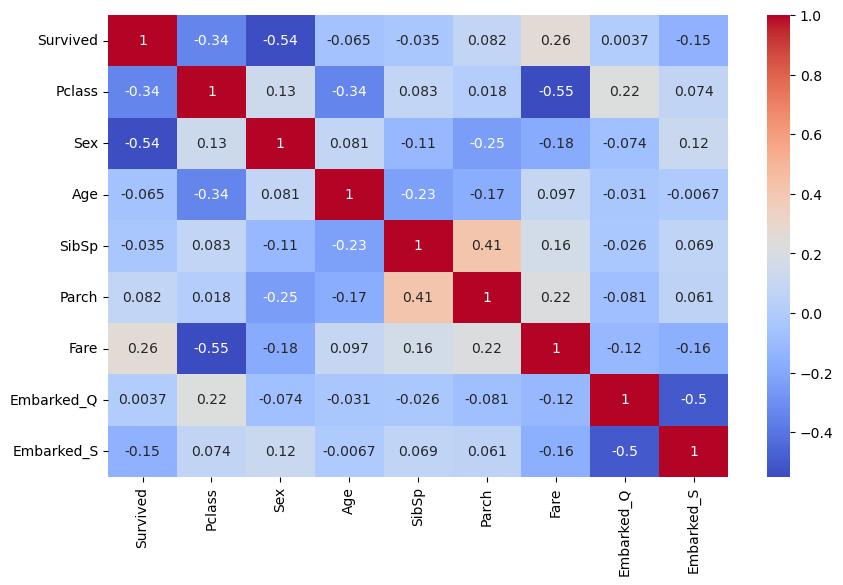

In [16]:
#define the correlation matrix
corr_matrix = df_train.corr()
plt.figure(figsize=(10, 6))
#plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## **Correlation: Survived vs Other Features**

#### 1. **Survived vs Pclass (-0.34) : Moderate negative correlation** 
Passengers in **lower classes** (3rd class) were **less likely to survive**, while those in **higher classes** (1st class) were **more likely to survive**.

#### 2. **Survived vs Sex (-0.54) : Strong negative correlation**
This suggests that **females** had a much higher survival rate than males. Males (coded 0) were less likely to survive compared to females (coded 1).

#### 3. **Survived vs Age (-0.065) : Very weak negative correlation**
There is almost **no relationship** between age and survival, meaning age alone did not significantly affect survival chances.

#### 4. **Survived vs SibSp (-0.035) : Very weak negative correlation**
This implies that having siblings or a spouse on board **did not significantly affect survival chances**.

#### 5. **Survived vs Parch (0.082) : Very weak positive correlation**
Having parents or children aboard had a **slight positive effect** on survival, but the impact is minimal.

#### 6. **Survived vs Fare (0.26) : Moderate positive correlation**
Passengers who paid **higher fares were more likely to survive**. This indicates wealthier passengers had a better chance of survival.

#### 7. **Survived vs Embarked_Q (0.0037) : Very weak positive correlation**
Embarking from Queenstown (Q) had **no significant effect on survival chances**.

#### 8. **Survived vs Embarked_S (-0.15) : Slight negative correlation**
Passengers embarking from Southampton (S) were **slightly less likely to survive**, though the impact is not strong.

---

## Summary of Key Correlations:
- **Sex** and **Pclass** have the strongest correlation with survival:
  - **Females** were more likely to survive.
  - **Higher-class passengers** (1st class) were more likely to survive.
- **Fare** and **Parch**   has a moderate positive correlation, indicating **richer passengers** had better chances of survival.
- Variables like **Age**, **SibSp** had very weak correlations, suggesting they were **not major predictors of survival**.


### **Dropping the Age and SibSp Columns**
1. **Age (-0.065 correlation with Survived)**
   - The **correlation between Age and Survived is very weak** and close to zero.
   - This indicates that age **does not have a significant impact** on whether a passenger survived or not.
   - Keeping the **Age** column might introduce unnecessary noise into the model and **won’t add predictive power**.

2. **SibSp (-0.035 correlation with Survived)**
   - Similar to Age, the **correlation between SibSp (siblings/spouses aboard) and Survived is extremely weak**.
   - Since the relationship between this feature and survival is negligible, it is **not a valuable predictor** for survival outcomes.
   - Dropping this column will help **simplify the dataset** without losing important information.

By dropping these columns, we can **reduce dimensionality** and **focus on features** that have a stronger influence on survival, which should improve model performance.


In [17]:
columns_to_drop = [ 'SibSp', 'Age']
df_train.drop(columns=columns_to_drop, inplace=True)
df_train.head()

,Survived,Pclass,Sex,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,False,True
1,1,1,0,0,71.2833,False,False
2,1,3,0,0,7.9250,False,True
3,1,1,0,0,53.1000,False,True
4,0,3,1,0,8.0500,False,True


In [18]:
X = df_train[['Pclass','Sex','Parch','Fare','Embarked_Q','Embarked_S']]
y = df_train['Survived']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.776536312849162
[[84 21]
 [19 55]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.72      0.74      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



### How to read the confusion matrix:
84 = TN : 84 passengers actually died, model predicted died.

21 = FP : 21 passengers actually died, model predicted survived.

19 = FN : 19 passengers actually survived, model predicted died.

55 = TP : 55 passengers actually survived, model predicted survived.

---

### From confusion matrix, you get:

Accuracy = (TP + TN) / total

Precision (for survived) = TP / (TP + FP)

Recall (for survived) = TP / (TP + FN)

F1 Score = harmonic mean of Precision & Recall

Support(class 0) = TN + FP (all actual deaths)

Support(class 1) = TP + FN (all actual survivors)

macro avg: simple average of precision, recall, and F1 across all classes.

weighted avg: average of precision, recall, F1, but weighted by the support of each class.

---

### Why **Logistic Regression** for Survival Prediction?

Even though survival is binary (0 = no, 1 = yes), logistic regression works by treating it as a regression problem on probabilities.
It predicts a continuous value between 0 and 1, which we then interpret as the probability of survival.

### How does it work?

It makes a linear combination with the input features: z = b0 + b1x1 + b2x2 + ...

then passes z through the sigmoid function, which squashes it into a probability between 0 and 1. If probability > 0.5 → predict Yes (1), else No (0).

We use logistic regression because it combines the strengths of regression (linear modeling of features) with classification (turning probabilities into 0/1 predictions).

In [21]:
#Random Forest Classifier
forest = RandomForestClassifier(random_state=42, n_estimators=100)
forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))


Random Forest Accuracy: 0.7988826815642458
[[88 17]
 [19 55]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [23]:
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_forest)
}

pd.DataFrame(models.items(), columns=["Model", "Accuracy"])


,Model,Accuracy
0,Logistic Regression,0.776536
1,Random Forest,0.798883
